## Likelihood

# Intuition
A likelihood quantifies how well a statistical model explains observed data. In Bayesian terms, it is the key ingredient in updating prior beliefs to posterior beliefs.

**FIGURE PLACEHOLDER:** ![Likelihood Intuition Cartoon](image_placeholder)

# Definition

- The **"likelihood"** for a model is defined as the probability of the data under the model. That is, given data $x$ (let's start with a single sample), the likelihood for a fully-specified (discrete) model $M$ is defined as

$$
L(M)=p(x|M)
$$
where $p(⋅|M)$ denotes the probability mass function (for discrete data) or probability density function (for continuous data) for model $M$.

- When there are multiple samples, $x_1, \dots, x_n$, the likelihood for the model $M$ is the joint probability of all these data points given the model. Assuming the samples are independent, the likelihood function is the product of the individual likelihoods for each sample:

$$
L(M) = p(x_1, x_2, \dots, x_n | M) = \prod_{i=1}^{n} p(x_i | M)
$$

This is because, under the assumption of independence, the joint probability of multiple independent samples is the product of their individual probabilities. 

# Example

## Single sample

In this example, we compare two models to assess the effect of a genetic variant on a quantitative trait, such as height. The models are:

1. **Model 1 ($M_1$)**: This model assumes that the genetic variant has no effect on the trait. Assumes the trait $y$ is normally distributed with mean 0 (no genetic effect) and standard deviation $\sigma$.
$$
y \sim \mathcal{N}(0, \sigma^2)
$$

where $y$ is the observed height for an individual.

2. **Model 2 ($M_2$)**: This model assumes that the genetic variant has an effect ($\beta = 1$) on the trait. Assumes the trait is normally distributed with mean 1 (genetic effect), where $x_i$ is the genotype (coded as 0, 1, or 2 for the number of copies of the minor allele).
  
$$
y \sim \mathcal{N}(1, \sigma^2)
$$

Suppose that for we have observed a series of concentration levels of this protein in $n$ individuals, then the question is therefore, **based on the data $(y_1,...,y_n)$, is this genetic variant associated with the trait or not? In other words, does the data support more of $M_1$ or $M_2$?**

In [1]:
# Simulate true mean and effect size
mu_0 <- 0  # population mean of the trait (e.g., height in cm) under Model 1
beta_true <- 1  # true effect size of the genetic variant
sigma <- 0.4  # standard deviation of the trait

In [2]:
set.seed(1)
# Simulate genotype
genotype <- c(1)
n = length(genotype)
# Simulate trait values based on the model 2
trait_value <- rnorm(n, mean = mu_0 + beta_true * genotype, sd = sigma)

# Data preview
data.frame(genotype = genotype, trait = trait_value)

genotype,trait
<dbl>,<dbl>
1,0.7494185


The likelihood for each model is the probability of observing the data $y$ given the parameters of the model. For a normal distribution, the likelihood is given by:
$$
L(\mu) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(y - \mu)^2}{2\sigma^2} \right)
$$

In [3]:
# Likelihood for a model with mu = mu_0, sigma = sigma
likelihood <- function(mu, sigma, y) {
  # n <- length(y)
  # (1 / (sqrt(2 * pi) * sigma))^n * exp(-sum((y - mu)^2) / (2 * sigma^2))
  prod(dnorm(y, mean = mu, sd = sigma, log = FALSE))
}

The Likehood for $M_1$ is:

In [4]:
likelihood_1_single_sample = likelihood(mu = mu_0, sigma, trait_value)

The Likehood for $M_2$ is:

In [5]:
likelihood_2_single_sample = likelihood(mu = mu_0+beta_true, sigma, trait_value)

In [6]:
cat("Likelihood of Model 1 (no causal effect) for a single sample:", likelihood_1_single_sample, "\n")
cat("Likelihood of Model 2 (causal effect) for a single sample:", likelihood_2_single_sample, "\n")

Likelihood of Model 1 (no causal effect) for a single sample: 0.1724349 
Likelihood of Model 2 (causal effect) for a single sample: 0.8196565 


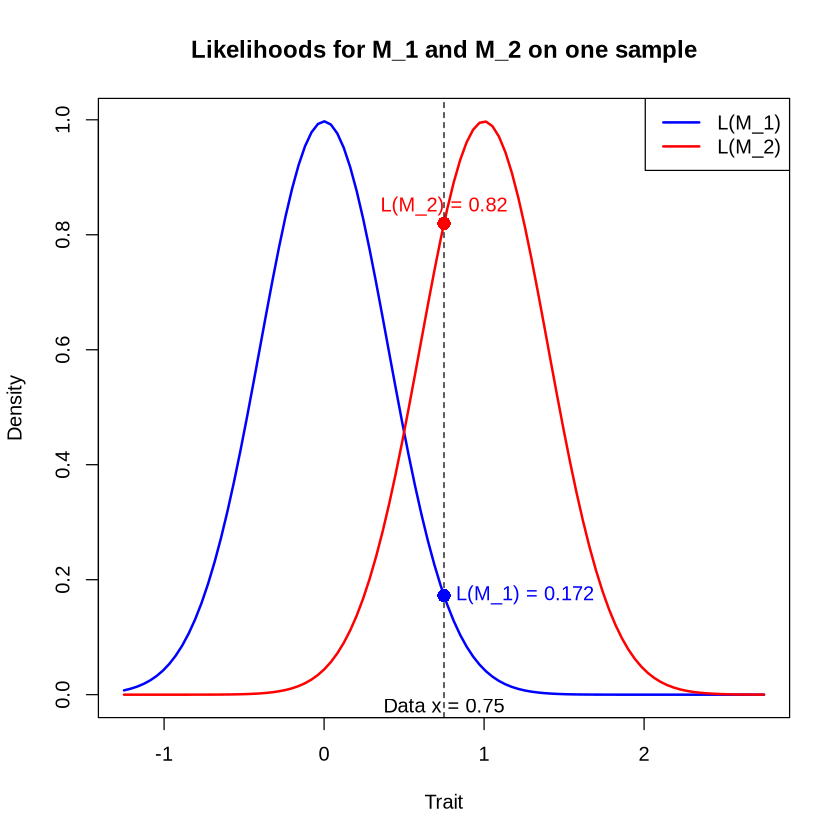

In [7]:
# Create a sequence of x values for plotting the density
x_vals <- seq(trait_value - 2, trait_value + 2, length.out = 100)

# Compute the likelihood densities for both models
likelihood_1_curve <- dnorm(x_vals, mean = mu_0, sd = sigma)
likelihood_2_curve <- dnorm(x_vals, mean = mu_0 + beta_true, sd = sigma)

# Plot the two likelihood curves
plot(x_vals, likelihood_1_curve, type = "l", col = "blue", lwd = 2, 
     xlab = "Trait", ylab = "Density", 
     main = "Likelihoods for M_1 and M_2 on one sample")
lines(x_vals, likelihood_2_curve, col = "red", lwd = 2)

# Add vertical black dashed line to show the observed trait_value
abline(v = trait_value, col = "black", lty = 2)

# Label the y-values at the trait_value for both curves
y_label_1 <- dnorm(trait_value, mean = mu_0, sd = sigma)
y_label_2 <- dnorm(trait_value, mean = mu_0 + beta_true, sd = sigma)

text(trait_value, y_label_1, labels = paste("L(M_1) =", round(y_label_1, 3)), pos = 4, col = "blue")
text(trait_value, y_label_2, labels = paste("L(M_2) =", round(y_label_2, 3)), pos = 3, col = "red")

# Add points at the intersection of the trait_value on both curves
points(trait_value, y_label_1, col = "blue", pch = 16, cex = 1.5)
points(trait_value, y_label_2, col = "red", pch = 16, cex = 1.5)

# Add label for the trait value on the x-axis
text(trait_value, 0.01, labels = paste("Data x =", round(trait_value, 2)), pos = 1, col = "black")

# Add a legend
legend("topright", legend = c("L(M_1)", "L(M_2)"), 
       col = c("blue", "red"), lwd = 2)

## Multiple samples

Now what if we have **multiple samples**, i.e., in this case, several individuals?

therefore, if $y_i$ ($i=1,...,n$) is the observed trait value for individual $i$, then under **$M_1$**:
$$
y_i \sim \mathcal{N}(0, \sigma^2)
$$

versus under **$M_2$**:
$$
y_i \sim \mathcal{N}(1, \sigma^2)
$$

The likelihood for each model is the probability of observing the data given the parameters of the model. For a normal distribution, the likelihood for each individual $i$ is given by:
$$
L(\mu) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(x_i - \mu)^2}{2\sigma^2} \right)
$$

In [8]:
set.seed(2)
# Simulate genotype
genotypes <- c(0,2,1)
n = length(genotypes)

# Simulate trait values based on the model 2
trait_values <- rnorm(n, mean = mu_0 + beta_true * genotypes, sd = sigma)

# Data preview
data.frame(genotype = genotypes, trait = trait_values)

genotype,trait
<dbl>,<dbl>
0,-0.3587658
2,2.0739397
1,1.6351381


In [9]:
likelihood_1_multiple_samples = likelihood(mu = mu_0, sigma, trait_values)

In [10]:
likelihood_2_multiple_samples = likelihood(mu = mu_0+beta_true, sigma, trait_values)

In [11]:
cat("Likelihood of Model 1 (no causal effect) for multiple samples:", likelihood_1_multiple_samples, "\n")
cat("Likelihood of Model 2 (causal effect) for multiple samples:", likelihood_2_multiple_samples, "\n")

Likelihood of Model 1 (no causal effect) for multiple samples: 2.268479e-10 
Likelihood of Model 2 (causal effect) for multiple samples: 2.388424e-05 


## Log-likelihood

In practice, the **log-likehood** is often preferred over the likelihood when there are multiple samples, for several reasons:

1. **Numerical Stability**:  
   Likelihood values are often very small, especially in large datasets. Directly working with such small numbers can cause numerical underflow. Taking the logarithm transforms these small numbers into more manageable values.

2. **Simplifies Computation**:  
   Many likelihood functions involve products of probabilities. The logarithm converts these products into sums, making them easier to compute and differentiate:

   $$
   l(\mu) = \log P(X_1, X_2, ..., X_n | \mu) = \sum_{i=1}^{n} \log P(X_i | \mu)
   $$

   This is particularly useful in optimization and estimation procedures.

3. **Convexity and Optimization**:  
   In many cases, the log-likelihood function is concave (or at least easier to optimize) compared to the likelihood function. This makes methods like gradient ascent and Newton-Raphson more effective.

4. **Consistency with Information-Theoretic Measures**:  
   Many statistical criteria, such as the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC), are based on log-likelihood. This aligns statistical inference with concepts from information theory.

5. **Asymptotic Properties**:  
   In large-sample theory (e.g., asymptotics of Maximum Likelihood Estimation), the log-likelihood has well-defined properties, such as its relationship to the Fisher Information and the Central Limit Theorem.

Overall, the log-likelihood improves numerical precision, simplifies mathematical operations, and aligns with theoretical properties that are useful for statistical inference.

In this case, the log-likelihood for a normal distribution is given by:

$$
\ell(\mu, \sigma) = -\frac{n}{2} \log(2\pi\sigma^2) - \sum_{i=1}^{n} \frac{(y_i - \mu)^2}{2\sigma^2}
$$

Therefore the log-likelihood for a normal model with mean $\mu$ and standard error $\sigma$ is:

In [12]:
# Log-likelihood for a model with mu and sigma
log_likelihood <- function(mu, sigma, y) {
  # n <- length(y)
  # -0.5 * n * log(2 * pi * sigma^2) - sum((y - mu_0)^2) / (2 * sigma^2)
  sum(dnorm(y, mean = mu, sd = sigma, log = TRUE))
}


The log-likehood for $M_1$ is:

In [13]:
loglikelihood_1_multiple_samples = log_likelihood(mu = mu_0, sigma, trait_values)

The log-likehood for $M_2$ is:

In [14]:
loglikelihood_2_multiple_samples = log_likelihood(mu = mu_0+beta_true, sigma, trait_values)

In [15]:
cat("Log-likelihood of Model 1 (no causal effect) for multiple samples:", loglikelihood_1_multiple_samples, "\n")
cat("Log-likelihood of Model 2 (causal effect) for multiple samples:", loglikelihood_2_multiple_samples, "\n")

Log-likelihood of Model 1 (no causal effect) for multiple samples: -22.20674 
Log-likelihood of Model 2 (causal effect) for multiple samples: -10.64229 


If we calculate the likelihood first and then take the log of it, they are the same:

In [16]:
log(likelihood_1_multiple_samples)
log(likelihood_2_multiple_samples)

[1] -22.20674

[1] -10.64229

# Summary
- The **"likelihood"** for a model is defined as the probability of the data under the model. That is, given data $x$, the likelihood for a fully-specified (discrete) model $M$ is defined as

$$
L(M)=p(x|M)
$$
where $p(⋅|M)$ denotes the probability mass function (for discrete data) or probability density function (for continuous data) for model $M$.

- In practice, **log-likehood** is often preferred over **likelihood** because of better numerical precision, simpler mathematical operations, and the fact that it aligns with theoretical properties that are useful for statistical inference:

$$
l(M)=\log(L(M)) = \log(p(x|M))
$$

- Although here we introduce likelihood for a model, in practice it is almost always the **likelihood ratio** (or **log-likelihood ratio**)  that matters (which we will introduce in the next notebook). As Matthew stated in the notes: 
> This is because actual likelihood values are generally not useful - it is only the ratios that matter when comparing the models. One way of thinking about this is that the actual likelihood values are very context dependent, and so likelihoods from different data sets are not comparable with one another.


# Supplementary Materials

Here we provide more examples to help you understand the likelihood.

## Example 1 -- allele frequency of elephant

### Description of the question

Here we use an example from [Matthew Stephen's notes](http://stephens999.github.io/fiveMinuteStats/likelihood_ratio_simple_models.html).

> [Technical Note: to simplify this problem I have assumed that elephants are haploid, which they are not. If you do not know what this means you should simply ignore this comment.]
>
> There are two subspecies of African Elephant: savannah and forest elephants, which differ in their genetic makeup. Interpol have seized an illegally-smuggled elephant tusk, and they want to know which subspecies of elephant the tusk came from. To try to answer this they collect DNA from the tusk and measure it at a number of locations (“markers” in genetics jargon) along the elephant genome. At each marker the DNA can be one of two types (“alleles” in genetics jargon), which for simplicity we will label 0 and 1. So the available data on the tusk might look something like this.
> 
> |Marker|Allele|
|:--:|:--:|
|1|	1|
|2|0|
|3|1|
|4|0|
|5|0|
|6|1|

In [17]:
x = c(1,0,1,0,0,1)

> Interpol also have information on the frequency of each allele in each of the two subspecies - this was obtained by measuring the DNA of a large number of savanna elephants and a large number of forest elephants. We will use $f_{S{j}}$ and $f_{F{j}}$ to denote the frequency of “1” allele at marker j in savanna and forest elephants respectively (and since there are only two alleles, the frequency of the 0 allele is $1−f_{S{j}}$ and $1−f_{F{j}}$). Here is a table of this information.
>
> | marker | $f_S$  | $f_F$  |
|:--------:|:-----:|:-----:|
| 1      | 0.40 | 0.80 |
| 2      | 0.12 | 0.20 |
| 3      | 0.21 | 0.11 |
| 4      | 0.12 | 0.17 |
| 5      | 0.02 | 0.23 |
| 6      | 0.32 | 0.25 |


In [18]:
fS = c(0.40, 0.12,0.21,0.12,0.02,0.32)
fF = c(0.8,0.2,0.11,0.17,0.23,0.25)

> The question before us is: **Which subspecies of elephant did the tusk come from, and how confident should we be in this conclusion?**

### Solution

> We can phrase this problem as a “model comparison” problem. We have data $X=x$ from our tusk, and we have two different models for how those data might have arisen: it could have been sampled from a savanna elephant, or it could have been sampled from a forest elephant. We will use $M_S$ and $M_F$ as shorthand for these two models. A key point is that these two models imply different probability distributions for $X$: some values of $X$ are more common under $M_S$ and others are more common under $M_F$.
>
> Denoting the probability mass functions of these two distributions p(⋅|MS) and p(⋅|MF), and assuming the data at different markers are independent, these probability distributions are:
> $$
p(x|M_S)=\prod_j f_{S_j}^{x_j}(1−f_{S_j})^{1−x_j}
$$
>
> and
> $$
p(x|M_F)=\prod_j f_{F_j}^{x_j}(1−f_{F_j})^{1−x_j}
$$
>>
>
> where the values of $f_S$ and $f_F$ are given in the table above.
>
> The key idea to introduce here is that a useful summary of how strongly the data $x$ support one model vs another model is given by the “likelihood ratio” (LR).

**So before we drive ourselves into the likelihood ratio of two methods, in this notebook, let's focus on the likelihood:**

The **"likelihood"** for a model is defined as the probability of the data under the model. That is, given data $x$, the likelihood for a fully-specified (discrete) model M is defined as

$$
L(M_S)=p(x|M_S)=\prod_j f_{S_j}^{x_j}(1−f_{S_j})^{1−x_j} \\
L(M_F)=p(x|M_F)=\prod_j f_{F_j}^{x_j}(1−f_{F_j})^{1−x_j}
$$
where $p(⋅|M)$ denotes the probability mass function for model $M$.

In [19]:
L = function(f,x){ prod(f^x*(1-f)^(1-x)) }

In [20]:
L(fS,x)

[1] 0.02039955

In [21]:
L(fF,x)

[1] 0.01124816

## Example 2 -- concentration of protein in the blood 

### Description

> A medical screening test for a disease involves measuring the concentration ($X$) of a protein in the blood. In normal individuals $X$ has a Gamma distribution with mean 1 and shape 2. In diseased individuals the protein becomes elevated, and $X$ has a Gamma distribution with mean 2 and shape 2. Plotting the probability density functions of these distributions yields:
> 

Suppose that for a particular individual we observe $X=4.02$. Then the question is

**Is this individual from the normal group or the diseased group?**

### Solution

The likelihood for the two models -- normal individual group ($M_0$) or diseased individual group ($M_1$) --- can therefore be calculated as:


$$
L(M_0)=p(x|M_0)= \frac{\beta_0^{\alpha_0} x^{\alpha_0 - 1} e^{-\beta_0 x}}{\Gamma(\alpha_0)} = \frac{2^2 \cdot 4.02^{2 - 1} e^{-2 \cdot 4.02}}{\Gamma(2)}\\
L(M_1)=p(x|M_1)= \frac{\beta_1^{\alpha_1} x^{\alpha_1 - 1} e^{-\beta_1 x}}{\Gamma(\alpha_1)} = \frac{1^2 \cdot 4.02^{2 - 1} e^{-1 \cdot 4.02}}{\Gamma(2)}
$$


The difference here is that instead of the **probability mass functions** that we used in the first example, here we use the **probability density functions (PDF)** of Gamma distribution:

$$
f(x; \alpha, \beta) = \frac{\beta^\alpha x^{\alpha - 1} e^{-\beta x}}{\Gamma(\alpha)}, \quad x > 0
$$


where:
- $\alpha$ is the shape parameter,
- $\beta$ is the rate parameter ($\beta = \frac{1}{\theta}$, where $\theta$ is the scale parameter),
- $\Gamma(\alpha)$ is the Gamma function.

In [22]:
X_val=4.02

In R we can use the [dgamma](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/GammaDist.html) function to calculate the PDF of gamma function at data $x$.

In [23]:
# dgamma(x, shape, rate = 1, scale = 1/rate, log = FALSE) returns the Density for the Gamma distribution with parameters shape and scale at x
y0_val = dgamma(X_val,scale=0.5,shape=2)
y1_val = dgamma(X_val,scale=1,shape=2)

This can be visualized from the figure below. 

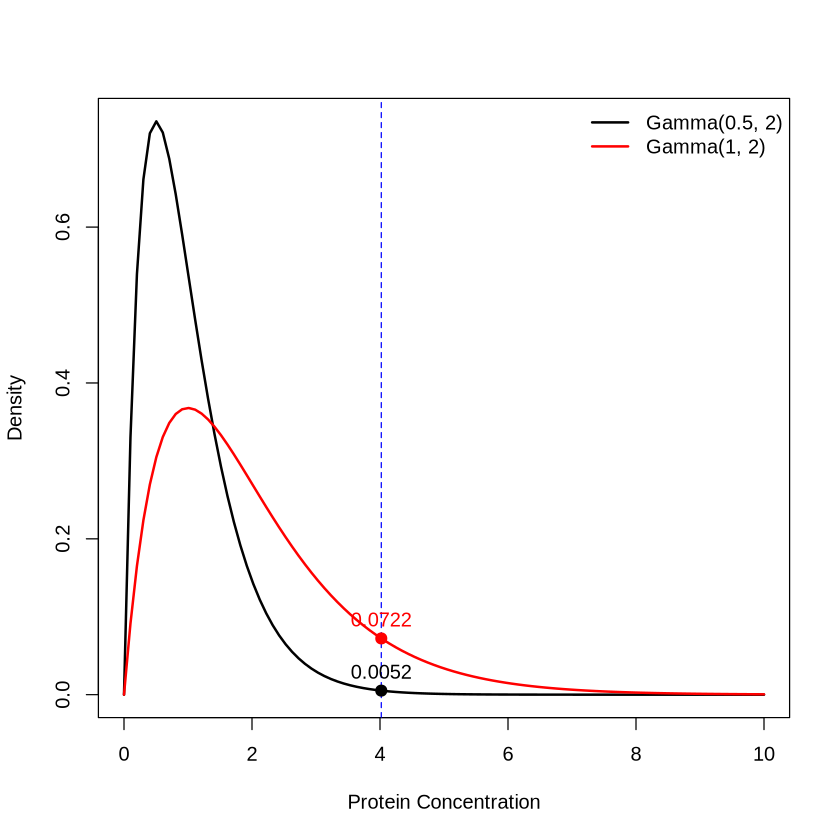

In [24]:
x <- seq(0, 10, length = 100)

# Compute density values
y0 <- dgamma(x, scale = 0.5, shape = 2)
y1 <- dgamma(x, scale = 1, shape = 2)

# Plot the first Gamma density
plot(x, y0, type = "l", xlab = "Protein Concentration", ylab = "Density",
     col = "black", lwd = 2, ylim = c(0, max(y0, y1)))

# Add the second Gamma density
lines(x, y1, col = "red", lwd = 2)

# Add a vertical line at x = 4.02
abline(v = X_val, lty = 2, col = "blue")

# Mark the corresponding points
points(X_val, y0_val, col = "black", pch = 19, cex = 1.2) # normal group
points(X_val, y1_val, col = "red", pch = 19, cex = 1.2) # diseased group

# Add text labels near the points
text(X_val, y0_val, labels = round(y0_val, 4), pos = 3, col = "black")
text(X_val, y1_val, labels = round(y1_val, 4), pos = 3, col = "red")

# Add legend
legend("topright", legend = c("Gamma(0.5, 2)", "Gamma(1, 2)"), 
       col = c("black", "red"), lwd = 2, bty = "n")


# Recommended Reading

- Statistical Rethinking, 2nd Edition, Section 2.1, 2.3, 2.4.
- Section *Likelihood Ratio and Likehood* in [FiveMinuteStats](http://stephens999.github.io/fiveMinuteStats/index.html) by Matthew Stephens
